In [ ]:
pip install yfinance

In [ ]:
pip install matplotlib

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statistics
from matplotlib import mlab
import pyfolio as pf
import datetime as dt

C:\Users\70141\AppData\Local\anaconda3\Lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [ ]:
tickers_list = ['TECHM.NS','HCLTECH.NS']

In [ ]:
daily_data=yf.download(tickers=tickers_list,start='2014-01-01',end='2022-01-01',interval="1d")['Adj Close']

[*********************100%%**********************]  2 of 2 completed


In [ ]:
daily_data

,HCLTECH.NS,TECHM.NS
Date,,
2014-01-01,251.086761,352.130341
2014-01-02,249.600357,349.818878
2014-01-03,251.336166,353.555756
2014-01-06,249.520599,349.770721
2014-01-07,250.657776,347.497803
...,...,...
2021-12-27,1169.057617,1641.838867
2021-12-28,1184.464355,1661.246704
2021-12-29,1191.844727,1643.540527


In [ ]:
#calculating returns
daily_data.dropna(how='any',inplace=True)
daily_data[['RETURNS1','RETURNS2']]=daily_data.iloc[:,0:2].pct_change()
daily_data
daily_data=daily_data[1:]
daily_data
list=daily_data.columns.values
list[0]

'HCLTECH.NS'

C:\Users\70141\AppData\Local\Temp\ipykernel_2268\3318703169.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_data[['normRETURNS1']]=((1 + daily_data[['RETURNS1']]).cumprod())
C:\Users\70141\AppData\Local\Temp\ipykernel_2268\3318703169.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_data[['normRETURNS2']]=((1 + daily_data[['RETURNS2']]).cumprod())
C:\Users\70141\AppData\Local\Temp\ipykernel_2268\3318703169.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

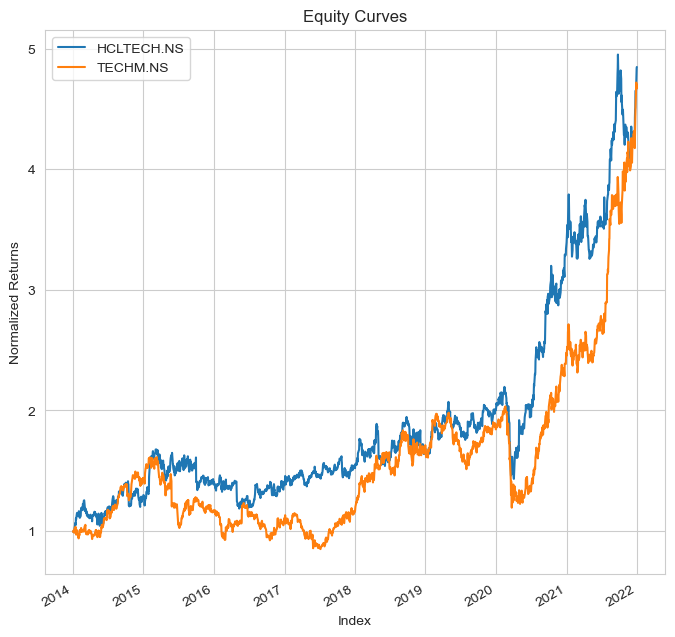

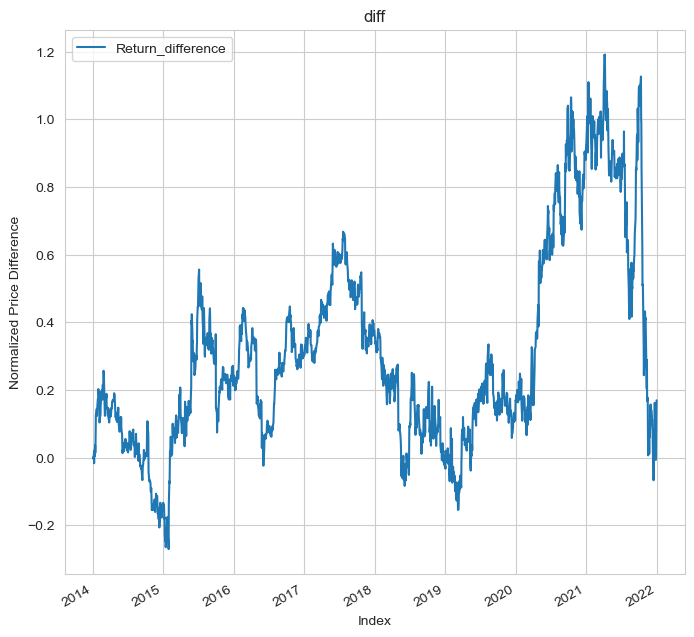

In [ ]:
#calculating normalized returns
daily_data[['normRETURNS1']]=((1 + daily_data[['RETURNS1']]).cumprod())
daily_data[['normRETURNS2']]=((1 + daily_data[['RETURNS2']]).cumprod())
daily_data['Return_difference']=daily_data['normRETURNS1']-daily_data['normRETURNS2']
sns.set_style('whitegrid')
daily_data['normRETURNS1'].plot(figsize=(8,8),label=list[0])
daily_data['normRETURNS2'].plot(figsize=(8,8),label=list[1])
plt.title('Equity Curves')
plt.ylabel("Normalized Returns")
plt.xlabel("Index")
plt.legend(loc='upper left')
plt.show()
sns.set_style('whitegrid')
daily_data['Return_difference'].plot(figsize=(8,8),label="Return_difference")
plt.title('diff')
plt.ylabel("Normalized Price Difference")
plt.xlabel("Index")
plt.legend(loc='upper left')
plt.show()

In [ ]:
# introducing the trading strategy with mean reverting concept: Whenever the spread goes above its 10 period rolling mean by one standard deviation, we’ll short the spread expecting the mean reversion behaviour to hold true. And whenever the spread goes below its 10 period rolling mean by one standard deviation, we’ll go long on the spread

C:\Users\70141\AppData\Local\Temp\ipykernel_2268\625942195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_data['ma_apply'] = daily_data['Return_difference'].rolling(10).mean()
C:\Users\70141\AppData\Local\Temp\ipykernel_2268\625942195.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_data['std_apply'] = daily_data['Return_difference'].rolling(10).std()
C:\Users\70141\AppData\Local\Temp\ipykernel_2268\625942195.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

C:\Users\70141\AppData\Local\Temp\ipykernel_2268\625942195.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_data.signal[i]=1
C:\Users\70141\AppData\Local\Temp\ipykernel_2268\625942195.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_data.signal[i]=-1
C:\Users\70141\AppData\Local\Temp\ipykernel_2268\625942195.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_data.signal[i]=-1
C:\Users\70141\AppData\Local\Tem

C:\Users\70141\AppData\Local\Temp\ipykernel_2268\625942195.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_data.signal[i]=0
C:\Users\70141\AppData\Local\Temp\ipykernel_2268\625942195.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_data.signal[i]=0
C:\Users\70141\AppData\Local\Temp\ipykernel_2268\625942195.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_data.signal[i]=0
C:\Users\70141\AppData\Local\Temp\

C:\Users\70141\AppData\Local\Temp\ipykernel_2268\625942195.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_data.dropna(inplace=True)


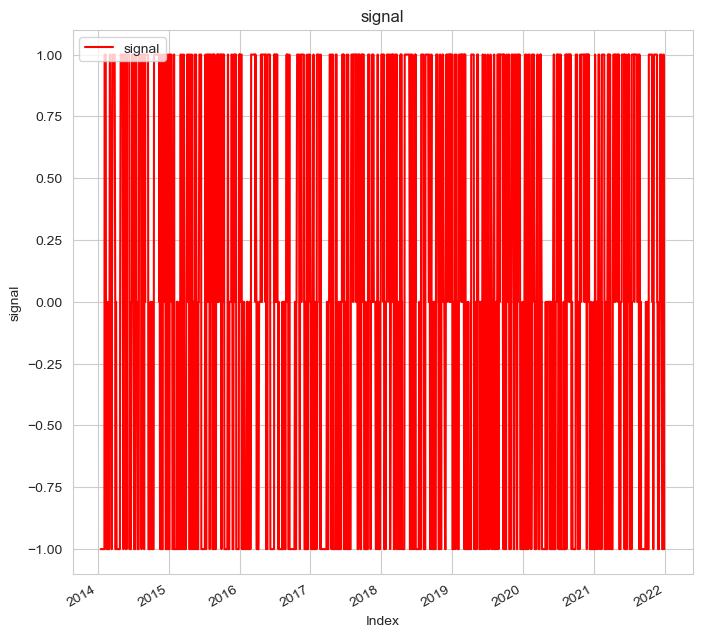

C:\Users\70141\AppData\Local\Temp\ipykernel_2268\625942195.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_data['spread_return']=daily_data['RETURNS1'] - daily_data['RETURNS2']
C:\Users\70141\AppData\Local\Temp\ipykernel_2268\625942195.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_data['trade_return']= daily_data['spread_return'] * (daily_data['signal'].shift(1))
C:\Users\70141\AppData\Local\Temp\ipykernel_2268\625942195.py:30: SettingWithCopyWarning: 
A value is trying to be set on 

,HCLTECH.NS,TECHM.NS,RETURNS1,RETURNS2,normRETURNS1,normRETURNS2,Return_difference,ma_apply,std_apply,signal,ub,lb,spread_return,trade_return
Date,,,,,,,,,,,,,,
2014-01-16,277.462250,359.478851,0.045364,-0.009448,1.105045,1.020869,0.084177,0.017815,0.027894,-1,0.031762,0.003868,0.054812,-0.054812
2014-01-17,275.257660,341.950317,-0.007946,-0.048761,1.096265,0.971090,0.125175,0.030638,0.042751,-1,0.052014,0.009263,0.040815,-0.040815
2014-01-20,285.422882,352.245911,0.036930,0.030108,1.136750,1.000328,0.136422,0.044234,0.052578,-1,0.070523,0.017945,0.006821,-0.006821
2014-01-21,287.328247,352.236298,0.006676,-0.000027,1.144338,1.000301,0.144038,0.057493,0.059636,-1,0.087311,0.027675,0.006703,-0.006703
2014-01-22,289.048798,354.836731,0.005988,0.007383,1.151191,1.007686,0.143505,0.073489,0.059047,-1,0.103013,0.043965,-0.001395,0.001395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,1169.057617,1641.838867,0.001581,0.035503,4.655991,4.662588,-0.006598,0.052818,0.089890,1,0.097763,0.007873,-0.033922,0.033922
2021-12-28,1184.464355,1661.246704,0.013179,0.011821,4.717351,4.717704,-0.000353,0.054796,0.088309,1,0.098951,0.010642,0.001358,0.001358
2021-12-29,1191.844727,1643.540527,0.006231,-0.010658,4.746745,4.667421,0.079324,0.069397,0.077387,0,0.108091,0.030704,0.016889,0.016889


In [ ]:
daily_data['ma_apply'] = daily_data['Return_difference'].rolling(10).mean()
daily_data['ma_apply']
daily_data['std_apply'] = daily_data['Return_difference'].rolling(10).std()
daily_data['std_apply']
daily_data['signal']='null'

n=0.5
daily_data['ub']=daily_data['ma_apply'] + n*daily_data['std_apply']
daily_data['lb']=daily_data['ma_apply'] - n*daily_data['std_apply']
for i in range(len(daily_data.Return_difference)):
 if(daily_data.Return_difference[i]>daily_data.ub[i]):
       daily_data.signal[i]=-1
 elif(daily_data.Return_difference[i] < daily_data.lb[i]):
       daily_data.signal[i]=1
 else:
       daily_data.signal[i]=0

daily_data.dropna(inplace=True)
sns.set_style('whitegrid')
daily_data['signal'].plot(figsize=(8,8),label="signal",color="red")
plt.title('signal')
plt.ylabel("signal")
plt.xlabel("Index")
plt.legend(loc='upper left')
plt.show()

daily_data['spread_return']=daily_data['RETURNS1'] - daily_data['RETURNS2']
daily_data['trade_return']= daily_data['spread_return'] * (daily_data['signal'].shift(1))

daily_data.dropna(inplace=True)
daily_data

Cumulative Returns: 7.45561182482486
Sharpe ratio: 0.07502687560050558
Annualized sharpe ratio: 1.1910147269107056
maximum drawdown: 0.3656014241963388
annualized_returns: 0.3156597072891343


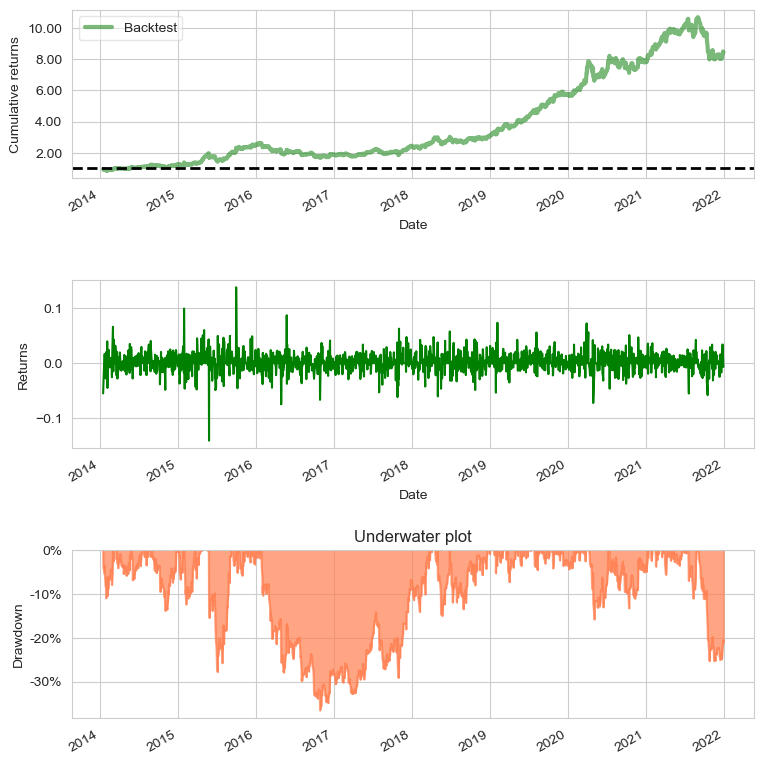

In [ ]:

a=daily_data['trade_return'].astype(float)
a
fig, axes = plt.subplots(ncols=1, nrows=3 ,figsize=(8,8))
plt.subplot(3,1,1)
pf.plotting.plot_rolling_returns(a)
plt.subplot(3,1,2)
pf.plotting.plot_returns(a)
plt.subplot(3,1,3)
pf.plot_drawdown_underwater(a)
fig.tight_layout(pad=2)

# Cumulative returns
cum_return =  ( (daily_data['trade_return'] + 1).cumprod() - 1 )
#cum_return = 100 * ((daily_data['trade_return'][-1])/(daily_data['trade_return'][0] - 1))
print('Cumulative Returns:',cum_return[-1])

#sharpe ratio
sharpe_ratio = daily_data['trade_return'].mean() / daily_data['trade_return'].std()
print('Sharpe ratio:',sharpe_ratio)

#annualized ratio
ASR = (252**0.5) * sharpe_ratio
print('Annualized sharpe ratio:',ASR)


#calculating max drawdown
cum_returns = (1 + daily_data['trade_return']).cumprod()
drawdown =  1 - cum_returns.div(cum_returns.cummax())
print('maximum drawdown:',max(drawdown))

#annualized returns
#Calculate the total return
annualized_returns= ((daily_data['trade_return'] + 1).prod() ** (252/len(daily_data.index.values)))-1
print("annualized_returns:",annualized_returns)

Correlation based pairs trading

In [ ]:
tickers_list = ['ICICIBANK.NS','SBIN.NS']

In [ ]:
daily_data_c=yf.download(tickers=tickers_list,start='2014-01-01',end='2023-07-21',interval="1d")['Adj Close']
daily_data_c

[*********************100%%**********************]  2 of 2 completed


,ICICIBANK.NS,SBIN.NS
Date,,
2014-01-01,176.533875,160.800278
2014-01-02,172.979721,158.755020
2014-01-03,171.564499,156.664246
2014-01-06,167.383148,153.794495
2014-01-07,168.862701,151.357529
...,...,...
2023-07-14,944.404175,584.400024
2023-07-17,952.913208,601.099976
2023-07-18,959.553223,592.349976


In [ ]:
daily_data_c.dropna(how='any',inplace=True)
daily_data_c[['RETURNS1','RETURNS2']]=daily_data.iloc[:,0:2].pct_change()


In [ ]:
cor=daily_data_c.RETURNS1.corr(daily_data_c.RETURNS2)

In [ ]:
daily_data_c["hedge_ratio"]=daily_data_c["ICICIBANK.NS"]/daily_data_c["SBIN.NS"]

In [ ]:
daily_data_c['roll_me'] = daily_data_c['hedge_ratio'].rolling(14).mean()
daily_data_c['roll_std'] = daily_data_c['hedge_ratio'].rolling(14).std()
daily_data_c['roll_std']
daily_data_c['signal']='null'
n=1
daily_data_c['roll_ub']=daily_data_c['roll_me'] + n*daily_data_c['roll_std']
daily_data_c['roll_lb']=daily_data_c['roll_me'] - n*daily_data_c['roll_std']
for i in range(len(daily_data_c.RETURNS1)):
 if(daily_data_c.hedge_ratio[i]>daily_data_c.roll_ub[i]):
       daily_data_c.signal[i]=-1
 elif(daily_data_c.hedge_ratio[i] < daily_data_c.roll_lb[i]):
       daily_data_c.signal[i]=1
 else:
       daily_data_c.signal[i]=0




C:\Users\70141\AppData\Local\Temp\ipykernel_2268\1797292607.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_data_c.signal[i]=0
C:\Users\70141\AppData\Local\Temp\ipykernel_2268\1797292607.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_data_c.signal[i]=0
C:\Users\70141\AppData\Local\Temp\ipykernel_2268\1797292607.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_data_c.signal[i]=0
C:\Users\70141\AppData\Lo

C:\Users\70141\AppData\Local\Temp\ipykernel_2268\1797292607.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_data_c.signal[i]=0
C:\Users\70141\AppData\Local\Temp\ipykernel_2268\1797292607.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_data_c.signal[i]=0
C:\Users\70141\AppData\Local\Temp\ipykernel_2268\1797292607.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_data_c.signal[i]=0
C:\Users\70141\AppData\Lo

C:\Users\70141\AppData\Local\Temp\ipykernel_2268\1797292607.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_data_c.signal[i]=1
C:\Users\70141\AppData\Local\Temp\ipykernel_2268\1797292607.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_data_c.signal[i]=0
C:\Users\70141\AppData\Local\Temp\ipykernel_2268\1797292607.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_data_c.signal[i]=0
C:\Users\70141\AppData\Lo

C:\Users\70141\AppData\Local\Temp\ipykernel_2268\1797292607.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_data_c.signal[i]=0
C:\Users\70141\AppData\Local\Temp\ipykernel_2268\1797292607.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_data_c.signal[i]=-1
C:\Users\70141\AppData\Local\Temp\ipykernel_2268\1797292607.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_data_c.signal[i]=0
C:\Users\70141\AppData\L

In [ ]:
daily_data_c['spread_return']=daily_data_c['RETURNS1'] - (daily_data_c['RETURNS2']*daily_data_c["hedge_ratio"])
daily_data_c['trade_return']= (daily_data_c['spread_return'] )* (daily_data_c['signal'].shift(1))
daily_data_c['trade_return']
daily_data_c.dropna(inplace=True)

Cumulative Returns: 0.14454037227398508
Sharpe ratio: 0.012438867230445776
Annualized sharpe ratio: 0.19746089569866174
maximum drawdown: 0.37244956523682693
annualized_returns: 0.017518079082532223


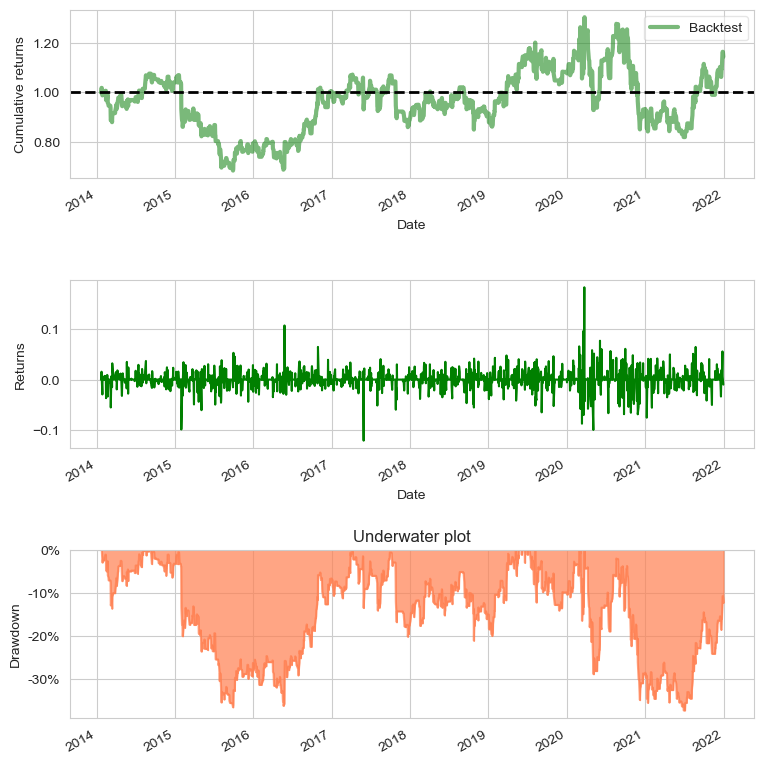

In [ ]:
#performance summary chart
b=daily_data_c['trade_return'].astype(float)
b
fig, axes = plt.subplots(ncols=1, nrows=3 ,figsize=(8,8))
plt.subplot(3,1,1)
pf.plotting.plot_rolling_returns(b)
plt.subplot(3,1,2)
pf.plotting.plot_returns(b)
plt.subplot(3,1,3)
pf.plot_drawdown_underwater(b)
fig.tight_layout(pad=2)

# Cumulative returns
cum_return =  ( (daily_data_c['trade_return'] + 1).cumprod() - 1 )
#cum_return = 100 * ((daily_data['trade_return'][-1])/(daily_data['trade_return'][0] - 1))
print('Cumulative Returns:',cum_return[-1])

#sharpe ratio
sharpe_ratio = daily_data_c['trade_return'].mean() / daily_data_c['trade_return'].std()
print('Sharpe ratio:',sharpe_ratio)

#annualized ratio
ASR = (252**0.5) * sharpe_ratio
print('Annualized sharpe ratio:',ASR)


#calculating max drawdown
cum_returns = (1 + daily_data_c['trade_return']).cumprod()
drawdown =  1 - cum_returns.div(cum_returns.cummax())
print('maximum drawdown:',max(drawdown))

#annualized returns
#Calculate the total return
annualized_returns= ((daily_data_c['trade_return'] + 1).prod() ** (252/len(daily_data_c.index.values)))-1
print("annualized_returns:",annualized_returns)